In [89]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("abalone.csv")
df

In [ ]:
df

In [ ]:
df.keys()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.size

In [65]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [66]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

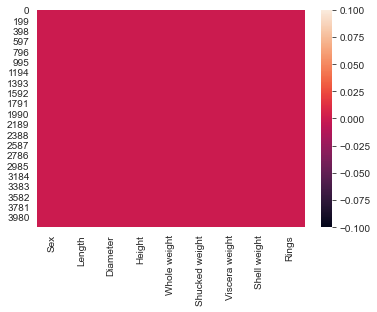

In [67]:
sns.heatmap(df.isnull())

<AxesSubplot:>

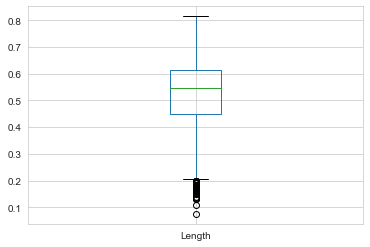

In [68]:
df['Length'].plot.box()

In [69]:
# ldf['Diameter'].plot.box()

<AxesSubplot:>

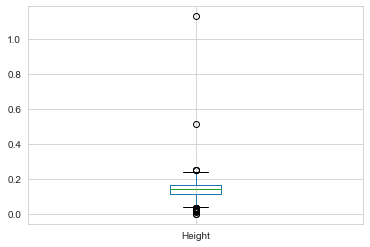

In [70]:
df['Height'].plot.box()

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

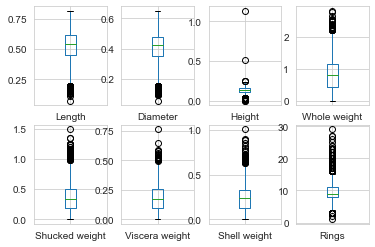

In [71]:
df.plot(kind='box',subplots=True,layout=(2,4))

<AxesSubplot:ylabel='Frequency'>

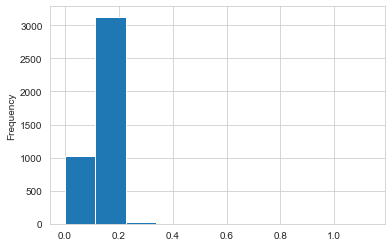

In [72]:
df['Height'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

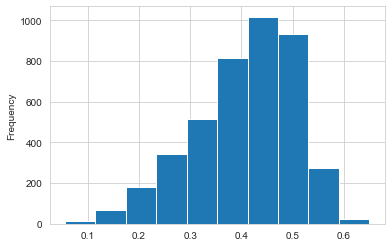

In [73]:
df['Diameter'].plot.hist()

In [74]:
#log transformation
from scipy.stats import boxcox
df['Length']=boxcox(df['Length'],0)

<AxesSubplot:ylabel='Frequency'>

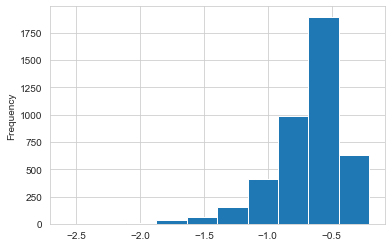

In [75]:
df['Length'].plot.hist()

In [76]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

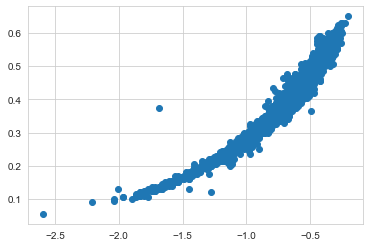

In [77]:
plt.scatter(df['Length'],df['Diameter'])
plt.show()

C:\Users\shikh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


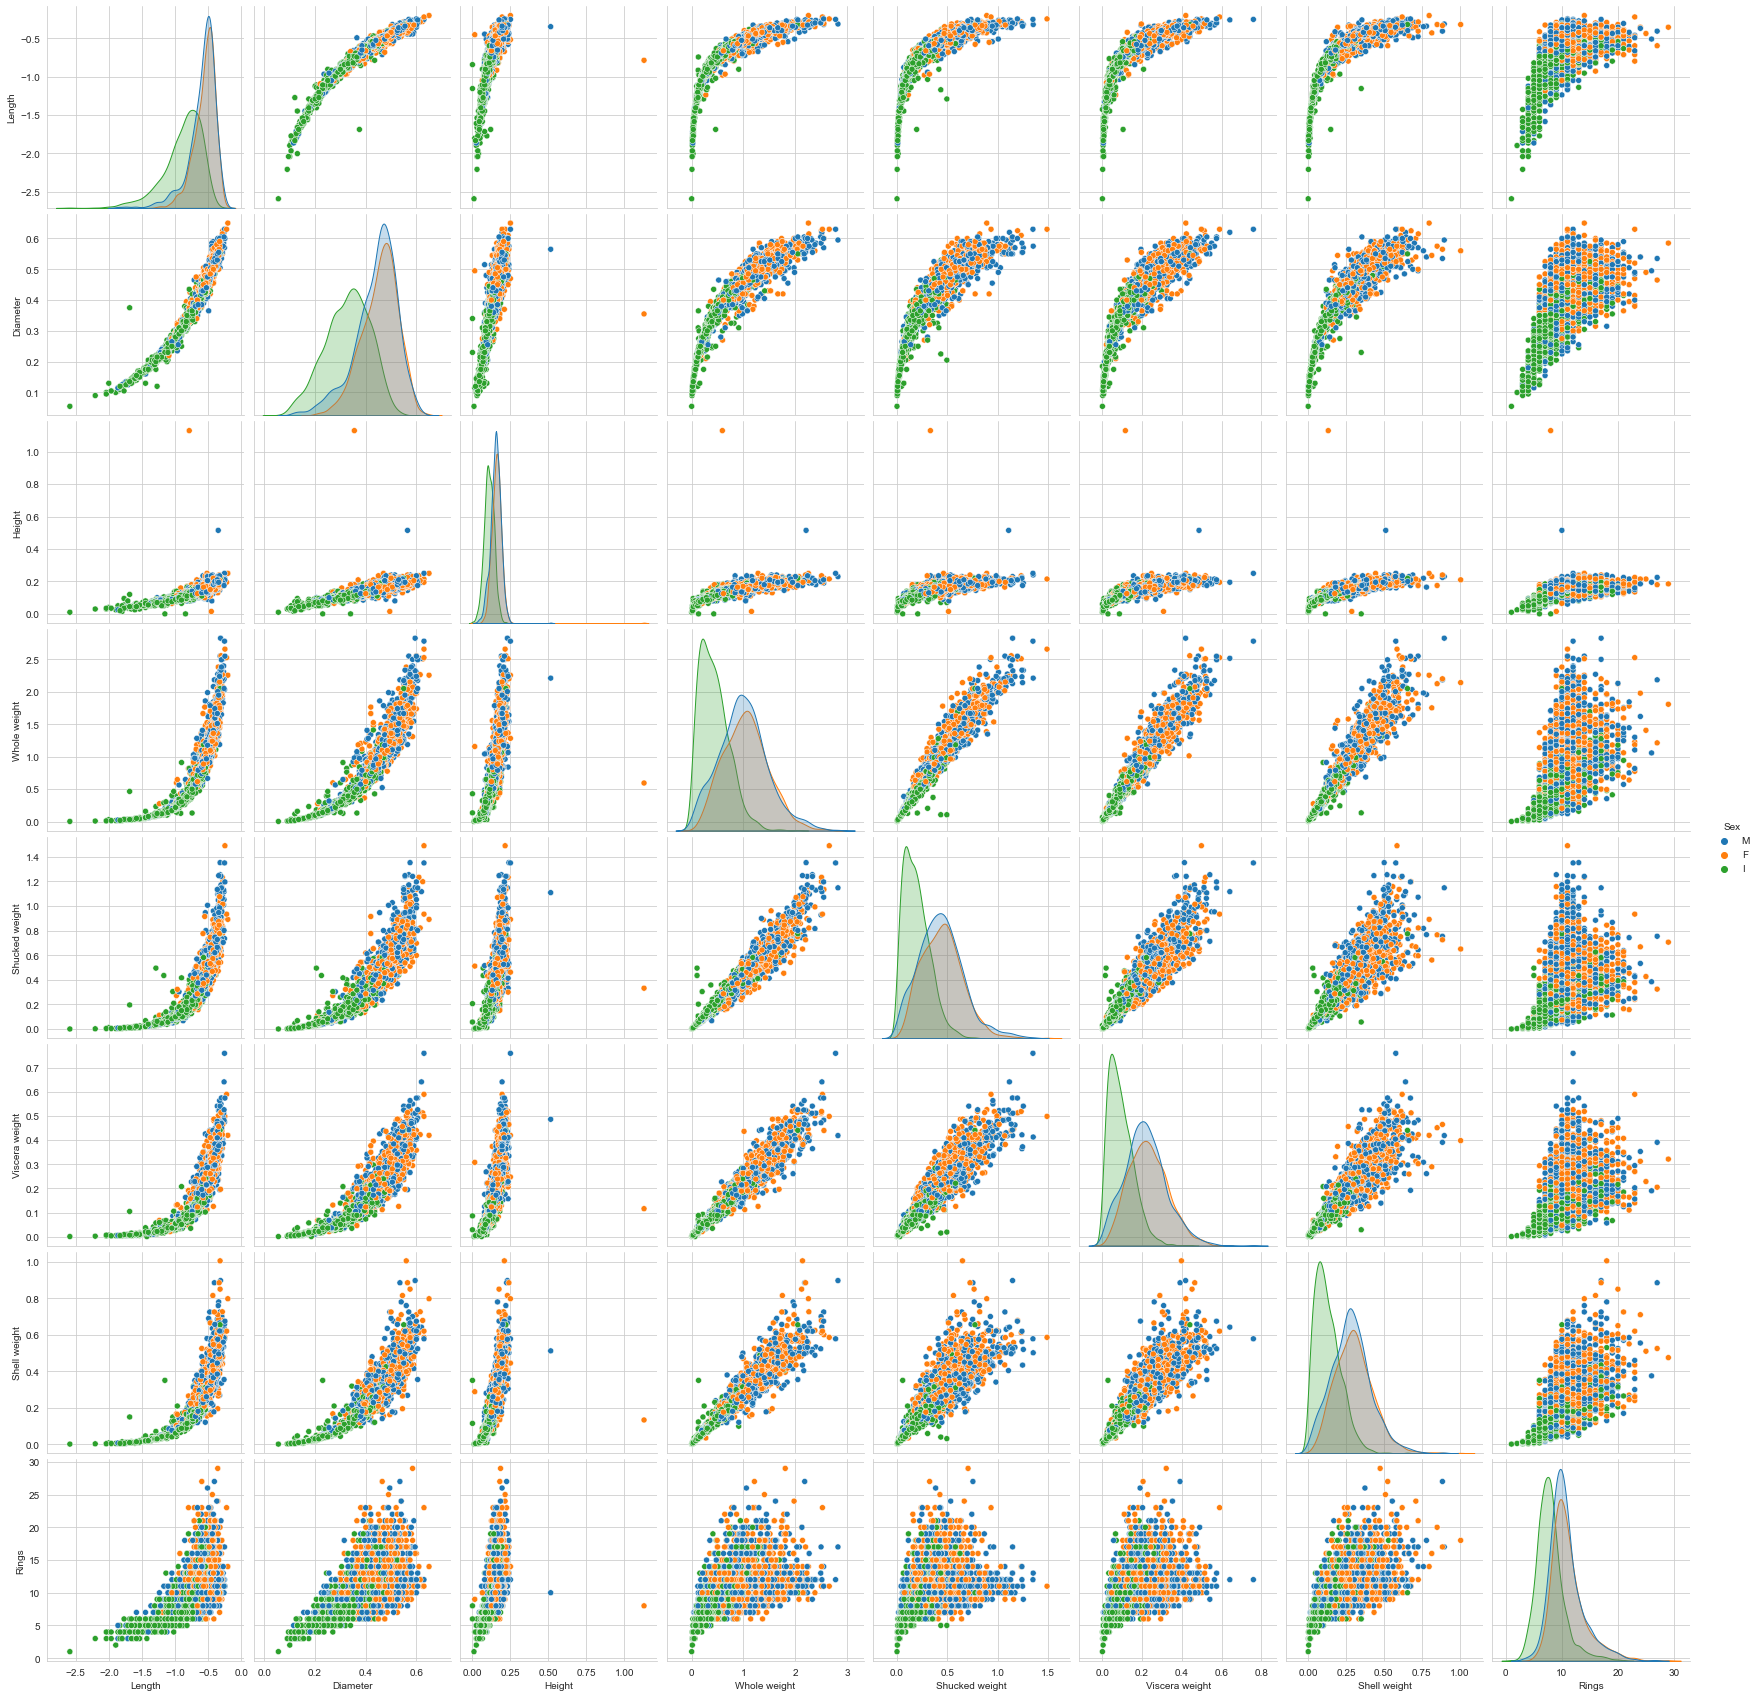

In [78]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Sex',size=3)
plt.show()

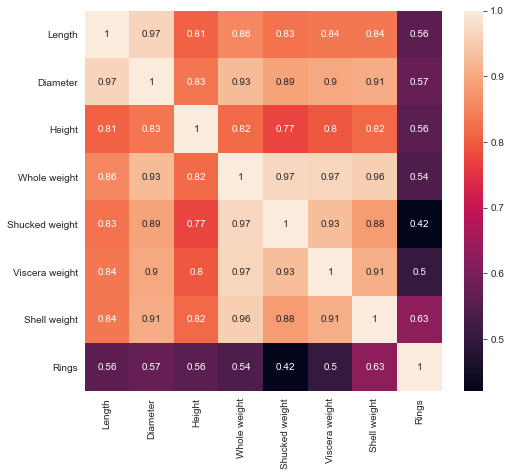

In [79]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

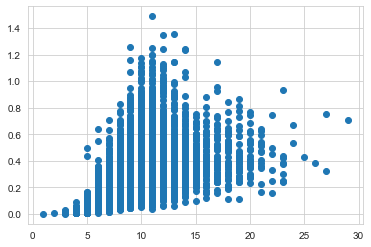

In [80]:
plt.scatter(df['Rings'],df['Shucked weight'])
plt.show()

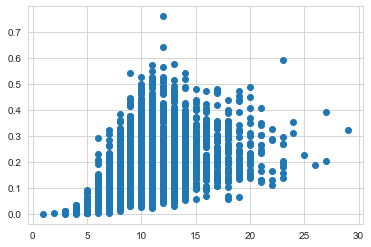

In [81]:
plt.scatter(df['Rings'],df['Viscera weight'])
plt.show()

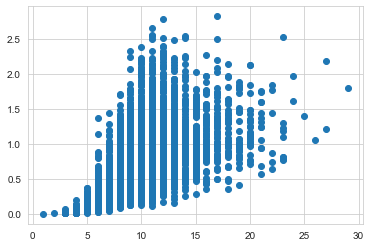

In [82]:
plt.scatter(df['Rings'],df['Whole weight'])
plt.show()

In [83]:
# drop the sex
df.drop('Sex',axis=1,inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.787458,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,-1.049822,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-0.634878,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,-0.820981,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,-1.108663,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [84]:
#classification 
x=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]
y=df['Rings']

In [91]:
#Test be 30% of the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
#breakdown of distribution of classes
print('Classs value of Count')
print(y_test.value_counts())
print('Class range of proportions')
print(y_test.value_counts()/len(y_test))


In [ ]:
1m = LinearRegression()

In [ ]:
1m.fit(x_train,y_train)

In [ ]:
1m.coef_

In [ ]:
1m.intercept_

In [ ]:
df.columns

In [ ]:
1m.score(x_train,y_train)

In [ ]:
pred=1m.predict(x_test)
print("Predicted age:",pred)
print("actual age",y_test)

In [ ]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

In [ ]:
#predict the age by providing the values
t=np.array([6.5,8.0,64.6,34.5,71.8,22.4,36.7])

In [ ]:
t.shape

In [ ]:
t=t.reshape(1,-1)
t.shape

In [ ]:
1m.predict(t)

In [ ]:
#to save the model
joblib.dump(t,'Abalone.pkl')